## <font color=darkorange> Multi-layer Perceptron & Convolutional neural networks (CNN)</font>

### <font color=darkred> MLP for regression</font>

In [1]:
# ignore warnings for better clarity (may not be the best thing to do)...
import warnings
warnings.filterwarnings('ignore')

In [2]:
from random import randint
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import activations
import numpy as np
import matplotlib.pyplot as plt
#from keras import backend as K
# ignore warnings for better clarity (may not be the best thing to do)...
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import cifar100

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist, boston_housing
from sklearn.preprocessing import MinMaxScaler

Dataset taken from the StatLib library which is maintained at Carnegie Mellon University.

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).
https://keras.io/datasets/#boston-housing-price-regression-dataset

In [4]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
scaler_x = MinMaxScaler()
scaler_x.fit(x_train)
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)
scaler_y = MinMaxScaler()
scaler_y.fit(y_train.reshape((-1, 1)))
y_train = scaler_y.transform(y_train.reshape((-1, 1)))
y_test = scaler_y.transform(y_test.reshape((-1, 1)))

In [5]:
print(x_train.shape, y_train.shape)

(404, 13) (404, 1)


In [6]:
layer_in = Dense(units = 64, activation = "relu", input_dim = x_train.shape[1])
layer_h1 = Dense(units = 64, activation = "relu")
layer_h2 = Dense(units = 64, activation = "relu")
layer_out = Dense(units = y_train.shape[1], activation = "linear")

In [7]:
model = Sequential()
model.add(layer_in)
model.add(layer_h1)
model.add(layer_h2)
model.add(layer_out)

model.compile(optimizer="sgd", loss="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [8]:
batch_size = 32
epochs = 25
history = model.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 404 samples, validate on 102 samples
Epoch 1/25
404/404 [==============================] - 0s 871us/step - loss: 0.1656 - val_loss: 0.0939
Epoch 2/25
404/404 [==============================] - 0s 63us/step - loss: 0.0716 - val_loss: 0.0565
Epoch 3/25
404/404 [==============================] - 0s 64us/step - loss: 0.0515 - val_loss: 0.0474
Epoch 4/25
404/404 [==============================] - 0s 74us/step - loss: 0.0459 - val_loss: 0.0432
Epoch 5/25
404/404 [==============================] - 0s 89us/step - loss: 0.0427 - val_loss: 0.0404
Epoch 6/25
404/404 [==============================] - 0s 74us/step - loss: 0.0402 - val_loss: 0.0379
Epoch 7/25
404/404 [==============================] - 0s 64us/step - loss: 0.0379 - val_loss: 0.0356
Epoch 8/25
404/404 [==============================] - 0s 72us/step - loss: 0.0358 - val_loss: 0.0335
Epoch 9/25
404/404 [==============================] - 0s 74us/step - loss: 0.0339 - val_loss: 0.0314
Epoch 10/25
404/404 [=======================

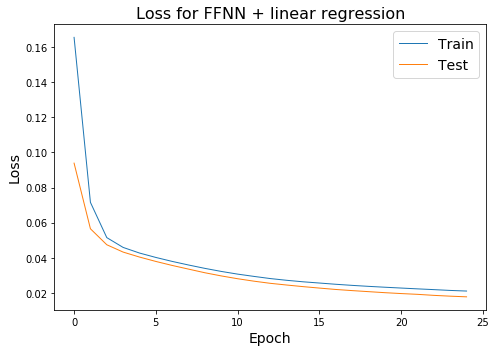

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['loss'], lw=1, label='Train')
plt.plot(history.epoch, history.history['val_loss'], lw=1, label='Test')
plt.legend(fontsize=14)
plt.title('Loss for FFNN + linear regression', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.tight_layout()

#### <font color=darkred> Optimization methods for neural networks</font>

``The ADAptive GRADient`` algorithm introduced by http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf, (Duchi et al. 2011), starts from $w^{(0)}$ and uses a learning rate $\eta > 0$ and a momentum $\alpha$ and defines, for all $k\geqslant 0$ and all $j \in\{1, \ldots , d\}$, 
$$
w_j^{(k+1)} \gets w_j^{(k)}  - \frac{\eta}{\sqrt{\sum_{\tau=1}^k (\nabla f (w^{(\tau)}))_j^2}} (\nabla f(w^{(k)}))_j\,.
$$
The rationale of this method is that different rates are used for all coordinates which is crucial for neural networks in which gradient at different layers can be of different order of magnitude. It is proved in https://arxiv.org/pdf/1806.01811.pdf (Ward et al., 2018) that AdaGrad achieves the same convergence rate as gradient descent with optimal fixed stepsize up to a $\log$ factor. The adaptive step size grows with the inverse of the gradient magnitudes, so that large gradients have small learning rates and small gradients have
large learning rates.

``AdaDelta`` Introduced in https://arxiv.org/pdf/1212.5701.pdf (Zeiler, 2012) to reduce the sensitivity to initial conditions of AdaGrad. Indeed, if the initial gradients are large, the learning rates of AdaGrad will be low for all updates which can be overcome by increasing $\eta$, but making the AdaGrad method highly sensitive to the choice of $\eta$.  


``RMSprop optimizer`` Unpublished method, from the course of http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf (Geoff Hinton).


``ADAM: Adaptive moment estimation`` Introduced in https://arxiv.org/pdf/1412.6980.pdf (Kingma et al., 2014) and considered as the state of the art to otpimize neural networks, the ADAM procedure update the parameter estimate as follows. Starting from $m_0 = 0$ and $v_0=0$ and choosing $\beta_1, \beta_2, \eta, \varepsilon
 \in (0,1)$, compute first and second moment estimate 
$$
m_k = \beta_1 m_{k-1} + (1 - \beta_1) \nabla f (w^{(k)}) \quad  \mathrm{and} \quad v_k = \beta_2 v_{k-1} + (1 - \beta_2) (\nabla f (w^{(k)}))^2\,,
$$
then, compute the correction terms
$$
\hat{m}_k = \frac{m_k}{1 - \beta_1^k} \quad \hat{v}_k = \frac{v_k}{1 - \beta_2^k}\,,
$$
and update the parameter estimate with
$$
w^{(k+1)} = w^{(k)} - \frac{\eta}{\sqrt{\hat{v}_k}+ \varepsilon} \hat{m}_k\,.
$$
First convergence results can be found in https://arxiv.org/pdf/1412.6980.pdf (Kingma et al., 2014) and examples where ADAM algorithm does not converge to the optimum are given in https://openreview.net/pdf?id=ryQu7f-RZ (Reddi et al., 2018). Recent analysis by https://arxiv.org/abs/1810.02263 (Barakat et al., 2018).

In [10]:
model = Sequential()
model.add(layer_in)
model.add(layer_h1)
model.add(layer_h2)
model.add(layer_out)

model.compile(optimizer="adam", loss="mse")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [11]:
batch_size = 32
epochs = 25
history = model.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
y_pred_ffnn = model.predict(x_test)

Train on 404 samples, validate on 102 samples
Epoch 1/25
404/404 [==============================] - 1s 2ms/step - loss: 0.0202 - val_loss: 0.0134
Epoch 2/25
404/404 [==============================] - 0s 69us/step - loss: 0.0139 - val_loss: 0.0103
Epoch 3/25
404/404 [==============================] - 0s 96us/step - loss: 0.0111 - val_loss: 0.0091
Epoch 4/25
404/404 [==============================] - 0s 86us/step - loss: 0.0092 - val_loss: 0.0101
Epoch 5/25
404/404 [==============================] - 0s 79us/step - loss: 0.0082 - val_loss: 0.0087
Epoch 6/25
404/404 [==============================] - 0s 81us/step - loss: 0.0078 - val_loss: 0.0101
Epoch 7/25
404/404 [==============================] - 0s 89us/step - loss: 0.0067 - val_loss: 0.0102
Epoch 8/25
404/404 [==============================] - 0s 79us/step - loss: 0.0066 - val_loss: 0.0091
Epoch 9/25
404/404 [==============================] - 0s 81us/step - loss: 0.0055 - val_loss: 0.0103
Epoch 10/25
404/404 [=========================

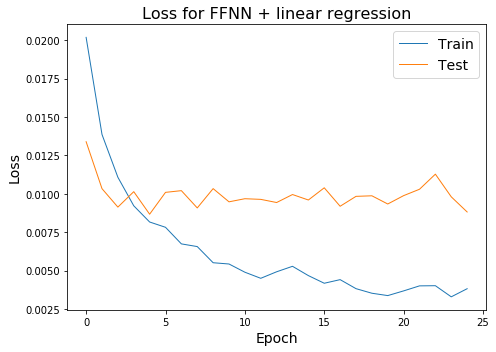

In [12]:
plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['loss'], lw=1, label='Train')
plt.plot(history.epoch, history.history['val_loss'], lw=1, label='Test')
plt.legend(fontsize=14)
plt.title('Loss for FFNN + linear regression', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.tight_layout()

#### <font color=darkred> Cross-validation neural networks</font>

In [13]:
from keras.wrappers.scikit_learn import KerasRegressor , KerasClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
def ffnn_model(nb_layer = 3, nb_neuron = 10):
    layer_in = Dense(units = nb_neuron, activation="relu", input_dim = x_train.shape[1])
    model = Sequential()
    model.add(layer_in)
    for i in range(nb_layer):
        hidden_layer = Dense(units = nb_neuron, activation="relu")
        model.add(hidden_layer)
    
    layer_out = Dense(units = y_train.shape[1], activation="relu")
    model.add(layer_out)
  
    model.compile(optimizer="adam", loss="mse")
    return model


parameters = {'nb_layer': [2, 3], 
              'nb_neuron': [32, 64, 128],
              'batch_size': [16, 32]}

keras_model = KerasRegressor(build_fn = ffnn_model, epochs = 25)

clf = GridSearchCV(keras_model, parameters, cv = 3)
clf.fit(x_train, y_train)

Epoch 1/25
269/269 [==============================] - 0s 1ms/step - loss: 0.0788
Epoch 2/25
269/269 [==============================] - 0s 130us/step - loss: 0.0405
Epoch 3/25
269/269 [==============================] - 0s 145us/step - loss: 0.0309
Epoch 4/25
269/269 [==============================] - 0s 178us/step - loss: 0.0288
Epoch 5/25
269/269 [==============================] - 0s 130us/step - loss: 0.0226
Epoch 6/25
269/269 [==============================] - 0s 122us/step - loss: 0.0197
Epoch 7/25
269/269 [==============================] - 0s 115us/step - loss: 0.0165
Epoch 8/25
269/269 [==============================] - 0s 171us/step - loss: 0.0142
Epoch 9/25
269/269 [==============================] - 0s 156us/step - loss: 0.0130
Epoch 10/25
269/269 [==============================] - 0s 130us/step - loss: 0.0112
Epoch 11/25
269/269 [==============================] - 0s 96us/step - loss: 0.0099
Epoch 12/25
269/269 [==============================] - 0s 89us/step - loss: 0.0096
Epoch

269/269 [==============================] - 0s 137us/step - loss: 0.0041
Epoch 18/25
269/269 [==============================] - 0s 130us/step - loss: 0.0037
Epoch 19/25
269/269 [==============================] - 0s 152us/step - loss: 0.0037
Epoch 20/25
269/269 [==============================] - 0s 141us/step - loss: 0.0029
Epoch 21/25
269/269 [==============================] - 0s 137us/step - loss: 0.0026
Epoch 22/25
269/269 [==============================] - 0s 130us/step - loss: 0.0037
Epoch 23/25
269/269 [==============================] - 0s 193us/step - loss: 0.0034
Epoch 24/25
269/269 [==============================] - 0s 163us/step - loss: 0.0036
Epoch 25/25
135/135 [==============================] - 0s 309us/step
Epoch 1/25
270/270 [==============================] - 0s 1ms/step - loss: 0.0542
Epoch 2/25
270/270 [==============================] - 0s 129us/step - loss: 0.0189
Epoch 3/25
270/270 [==============================] - 0s 159us/step - loss: 0.0104
Epoch 4/25
270/270 [====

269/269 [==============================] - 0s 167us/step - loss: 0.0072
Epoch 8/25
269/269 [==============================] - 0s 185us/step - loss: 0.0069
Epoch 9/25
269/269 [==============================] - 0s 163us/step - loss: 0.0061
Epoch 10/25
269/269 [==============================] - 0s 167us/step - loss: 0.0053
Epoch 11/25
269/269 [==============================] - 0s 167us/step - loss: 0.0060
Epoch 12/25
269/269 [==============================] - 0s 174us/step - loss: 0.0055
Epoch 13/25
269/269 [==============================] - 0s 163us/step - loss: 0.0054
Epoch 14/25
269/269 [==============================] - 0s 189us/step - loss: 0.0048
Epoch 15/25
269/269 [==============================] - 0s 208us/step - loss: 0.0035
Epoch 16/25
269/269 [==============================] - 0s 185us/step - loss: 0.0039
Epoch 17/25
269/269 [==============================] - 0s 163us/step - loss: 0.0042
Epoch 18/25
269/269 [==============================] - 0s 185us/step - loss: 0.0035
Epoch 

269/269 [==============================] - 0s 115us/step - loss: 0.0053
Epoch 25/25
135/135 [==============================] - 0s 576us/step
Epoch 1/25
270/270 [==============================] - 0s 1ms/step - loss: 0.0967
Epoch 2/25
270/270 [==============================] - 0s 81us/step - loss: 0.0336
Epoch 3/25
270/270 [==============================] - 0s 85us/step - loss: 0.0238
Epoch 4/25
270/270 [==============================] - 0s 92us/step - loss: 0.0193
Epoch 5/25
270/270 [==============================] - 0s 66us/step - loss: 0.0158
Epoch 6/25
270/270 [==============================] - 0s 89us/step - loss: 0.0131
Epoch 7/25
270/270 [==============================] - 0s 89us/step - loss: 0.0109
Epoch 8/25
270/270 [==============================] - 0s 100us/step - loss: 0.0091
Epoch 9/25
270/270 [==============================] - 0s 103us/step - loss: 0.0080
Epoch 10/25
270/270 [==============================] - 0s 96us/step - loss: 0.0071
Epoch 11/25
270/270 [================

269/269 [==============================] - 0s 74us/step - loss: 0.1897
Epoch 17/25
269/269 [==============================] - 0s 74us/step - loss: 0.1897
Epoch 18/25
269/269 [==============================] - 0s 63us/step - loss: 0.1897
Epoch 19/25
269/269 [==============================] - 0s 63us/step - loss: 0.1897
Epoch 20/25
269/269 [==============================] - 0s 67us/step - loss: 0.1897
Epoch 21/25
269/269 [==============================] - 0s 74us/step - loss: 0.1897
Epoch 22/25
269/269 [==============================] - 0s 74us/step - loss: 0.1897
Epoch 23/25
269/269 [==============================] - 0s 67us/step - loss: 0.1897
Epoch 24/25
269/269 [==============================] - 0s 70us/step - loss: 0.1897
Epoch 25/25
135/135 [==============================] - 0s 554us/step
Epoch 1/25
269/269 [==============================] - 1s 2ms/step - loss: 0.2050
Epoch 2/25
269/269 [==============================] - 0s 56us/step - loss: 0.2050
Epoch 3/25
269/269 [=============

C:\Users\duzen\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/25
404/404 [==============================] - 1s 1ms/step - loss: 0.0726
Epoch 2/25
404/404 [==============================] - 0s 132us/step - loss: 0.0193
Epoch 3/25
404/404 [==============================] - 0s 136us/step - loss: 0.0118
Epoch 4/25
404/404 [==============================] - 0s 158us/step - loss: 0.0086
Epoch 5/25
404/404 [==============================] - 0s 156us/step - loss: 0.0078
Epoch 6/25
404/404 [==============================] - 0s 163us/step - loss: 0.0073
Epoch 7/25
404/404 [==============================] - 0s 153us/step - loss: 0.0064
Epoch 8/25
404/404 [==============================] - 0s 151us/step - loss: 0.0064
Epoch 9/25
404/404 [==============================] - 0s 160us/step - loss: 0.0054
Epoch 10/25
404/404 [==============================] - 0s 151us/step - loss: 0.0050
Epoch 11/25
404/404 [==============================] - 0s 162us/step - loss: 0.0045
Epoch 12/25
404/404 [==============================] - 0s 163us/step - loss: 0.0050
Epo

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001A8D2A046C8>,
             iid='warn', n_jobs=None,
             param_grid={'batch_size': [16, 32], 'nb_layer': [2, 3],
                         'nb_neuron': [32, 64, 128]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

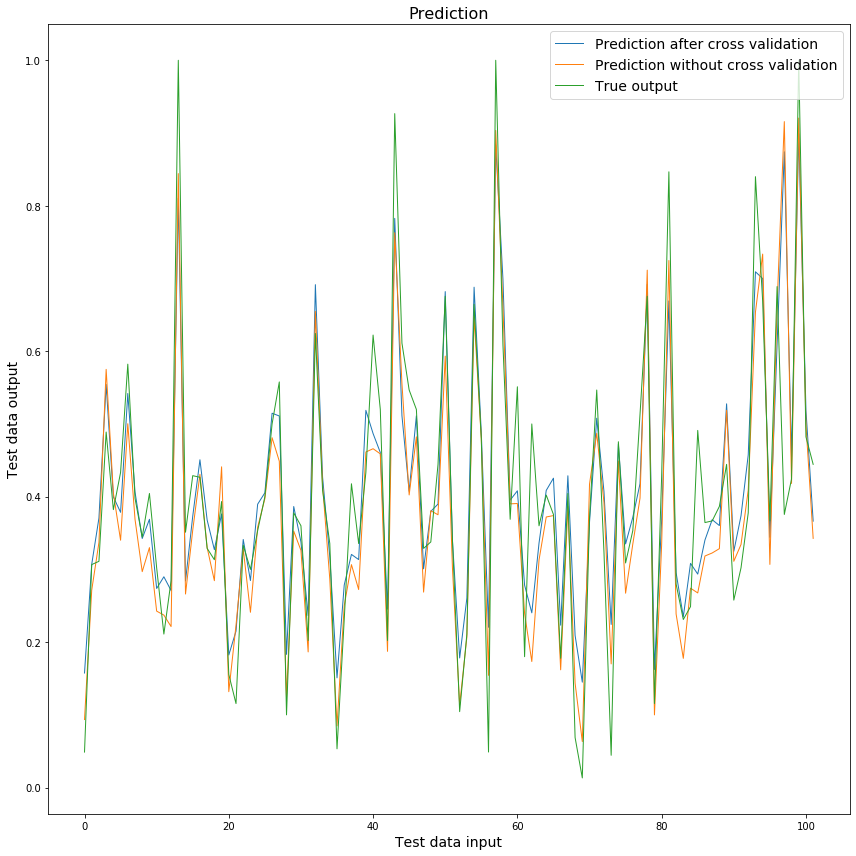

In [15]:
y_pred = clf.predict(x_test)
plt.figure(figsize=(12, 12))
plt.plot(range(x_test.shape[0]), y_pred, lw=1, label='Prediction after cross validation')
plt.plot(range(x_test.shape[0]), y_pred_ffnn, lw=1, label='Prediction without cross validation')
plt.plot(range(x_test.shape[0]), y_test, lw=1, label='True output')
plt.legend(fontsize=14)
plt.title('Prediction', fontsize=16)
plt.xlabel('Test data input', fontsize=14)
plt.ylabel('Test data output', fontsize=14)
plt.tight_layout()

### <font color=darkred> Convolution for image classification</font>

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton: https://www.cs.toronto.edu/~kriz/cifar.html
The dataset contains 60000 32x32x3 colour images divided in 100 classes.

In [16]:
# Number of classes
num_classes = 100
# input image dimensions
img_rows, img_cols = 32, 32

# cifar100 data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

input_shape = (img_rows, img_cols, 3)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print('input dimension:',x_train.shape[1::])

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

169009152/169001437 [==============================] - 37s 0us/step
50000 train samples
10000 test samples
input dimension: (32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [17]:
# normalize the input data to obtain entries in (0,1)
x_train = x_train/255
x_test  = x_test/255

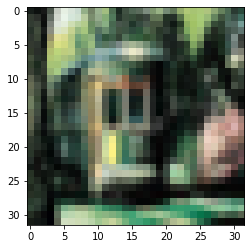

In [18]:
# display one input data at random
plt.imshow(x_train[randint(0, x_train.shape[0])])

In [19]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

#### <font color=darkred> Softmax regression </font>
Logistic regression can be extended to classify data in more than two groups. Softmax regression provides a model for the probability that an input $x$ is associated with each group.  It is assumed that the probability to belong to the class $k\in\{1,\ldots,M\}$ can be expressed by 
\begin{equation*}
\mathbb{P}(Y = k| X) = \frac{\exp(\langle w_k,X \rangle + b_k)}{\sum_{\ell=1}^{M}\exp(\langle w_\ell,X \rangle + b_\ell)} = p_k(X)\,,
\end{equation*}
where $w_\ell \in \mathbb{R}^d$ and $b_\ell$  are model `weights` and `intercepts` for each class.


To estimate these unknown parameters, a maximum likelihood approach is used as in the logistic regression setting. In this case, the loss function is given by the negative log-likelihood (see also the section on gradient based method).

In [20]:
# Create a model prone to add layers sequentially
model = Sequential()
# flatten the data replaces 32 * 32 * 3 matrices by a 3072 dimensional vector
# This is always necessary before a fully-connected layer (Dense object)
model.add(Flatten(input_shape=input_shape, name='flatten'))
# add one dense (fully connected layer) with softmax activation function
# As it is the first layer, the input size is mandatory
model.add(Dense(num_classes, activation='softmax', name='dense_softmax'))

# "compile" this model, 
model.compile(
    # specify the loss as the cross-entropy i.e. the negative loglikelihood.
    loss=keras.losses.categorical_crossentropy,
    # choose the gradient based method to estimate the parameters
    # see https://keras.io/optimizers/ to have an overview of the different options
    # see also section 2 on gradient based methods.
    optimizer=keras.optimizers.Adagrad(),
    # metric to monitor on the test data
    metrics=['accuracy']
)
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense_softmax (Dense)        (None, 100)               307300    
Total params: 307,300
Trainable params: 307,300
Non-trainable params: 0
_________________________________________________________________


In [21]:
# number of data used for each update of the parameter (each gradient computation)
batch_size = 64
# number of times data are scanned
epochs = 25
# train the model, i.e. estimate unknown parameters by minimizing the loss function using a gradient descent algorithm (here Adagrad).
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 112us/step - loss: 4.7039 - accuracy: 0.0822 - val_loss: 5.3181 - val_accuracy: 0.0331
Epoch 2/25
50000/50000 [==============================] - 6s 126us/step - loss: 3.8407 - accuracy: 0.1329 - val_loss: 4.2004 - val_accuracy: 0.0726
Epoch 3/25
50000/50000 [==============================] - 7s 142us/step - loss: 3.7466 - accuracy: 0.1508 - val_loss: 3.9217 - val_accuracy: 0.1110
Epoch 4/25
50000/50000 [==============================] - 8s 151us/step - loss: 3.6937 - accuracy: 0.1650 - val_loss: 3.8507 - val_accuracy: 0.1250
Epoch 5/25
50000/50000 [==============================] - 8s 156us/step - loss: 3.6550 - accuracy: 0.1711 - val_loss: 3.8027 - val_accuracy: 0.1421
Epoch 6/25
50000/50000 [==============================] - 7s 137us/step - loss: 3.6248 - accuracy: 0.1795 - val_loss: 3.8231 - val_accuracy: 0.1410
Epoch 7/25
50000/50000 [==============================] - 7s 1

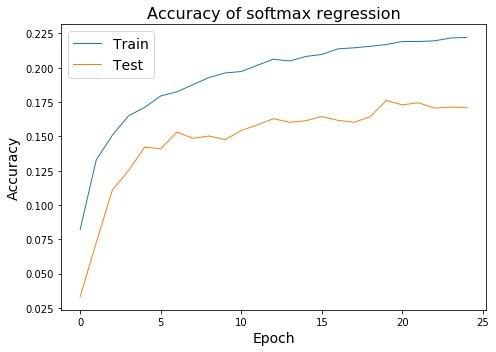

In [25]:
plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['accuracy'], lw=1, label='Train')
plt.plot(history.epoch, history.history['val_accuracy'], lw=1, label='Test')
plt.legend(fontsize=14)
plt.title('Accuracy of softmax regression', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tight_layout()

#### <font color=darkred> Feed-Forward Neural Network (FFNN) or multilayer Perceptron (MLP)</font>
The softmax regression of the previous section is a linear model, with 307300 parameters.  It might be too simple for our classification task.  The idea underlying neural networks is to have successive "neurons" performing a linear transformation of the input data (depending on a weight matrix and a bias vector) followed by an activation function to design more flexible models with additional parameters.

In [ ]:
# Create the graph for a fully connected feed-forward neural network with one hidden layer 
# with 256 units and a relu activation function. 
model_ffnn = Sequential()

model_ffnn.add(Flatten(input_shape=input_shape))

model_ffnn.add(Dense(256, activation='relu'))

model_ffnn.add(Dense(num_classes, activation='softmax'))

model_ffnn.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adagrad(),
    metrics=['accuracy']
)

model_ffnn.summary()

In this model the input data $X$ lies in $\mathbb{R}^d$ with $d = 3072$.

A hidden layer is built in $\mathbb{R}^h$ with $h = 256$.

\begin{align*}
z^\mathrm{hid}(X) &= W^hX+b^h\,,\\
h(X) &= \mathrm{Relu}(z^\mathrm{hid}(X))\,.
\end{align*}

$W^h\in\mathbb{R}^{hxd}$, $b^h\in\mathbb{R}^h$, $h(X)\in\mathbb{R}^h$ and for all $1\leqslant j\leqslant h$, $h(X)_j = \mathrm{Max}(0,z^\mathrm{hid}(X)_j)$. 

The output layer is built in $\mathbb{R}^M$ with $M = 100$.

\begin{align*}
z^\mathrm{out}(X) &= W^oX+b^o\,,\\
f_{\theta}(X) &= \mathrm{Softmax}(z^\mathrm{out}(X))\,.
\end{align*}

$W^o\in\mathbb{R}^{Mxh}$, $b^o\in\mathbb{R}^o$. 

$\theta = (W^h,b^h,W^o,b^o)$.

$f_{\theta}(X)$ is a vector in $\mathbb{R}^M$ where each entry is the probability that $X$  belongs to the corresponding class.

In [ ]:
batch_size = 64
epochs = 25
history = model_ffnn.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_data=(x_test, y_test))
score = model_ffnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['acc'], lw=1, label='Train')
plt.plot(history.epoch, history.history['val_acc'], lw=1, label='Test')
plt.legend(fontsize=14)
plt.title('Accuracy of softmax regression', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tight_layout()

The number of parameters is much larger than in the softmax setting while the performance only slightly improves. See next course on `Convolutional networks to provide models more suitable to image data`...

<font color=darkred> Use cross-validation to find the best values of $h$ for instance in $\{32,64,128,256,512\}$...</font>

### <font color=darkred> Convolutional Neural Networks </font>

In practice, increasing the size of hidden layers is not very effective. 
It is often a better idea to add more layers. 
Intuitively, if the observations have a hierarchical structure, adding more layers can be interpreted as a way to learn more levels of abstraction.  For example, in object detection tasks, it is easier to express shapes from edges and objects from shapes, than to express objects from pixels.  Thus, a good design should try to exploit this hierarchy.

In particular cases, such as grid-like data (time series, images), the observations can depend on a pattern which can be associated with different locations of the data. 
For example, an object can be in the middle or the left of the picture. 
Thus, the model has to be translation invariant: it is easier to learn how to recognize an object independently of its location. 

When two inputs might contain the same kind of information, then it is useful to share their weights and estimate the weights jointly for those inputs to learn statistical invariants (things that don't change much on average across time or space). 
Using this concept on images leads to convolutional neural networks (CNNs), on text, it results on recurrent neural networks (RNNs).  When using CNNs, weights are set to a small kernel that is used to perform a convolution across the image.

In the previous example, the step ``model_ffnn.add(Flatten(input_shape=input_shape))`` destroys the spatial organization of the input but is mandatory before the fully connected step: ``model_ffnn.add(Dense(128, activation='relu'))``. The spatial organization of the input may be preserved before using Flatten by convolution steps such as ``model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))``. This layer has 32 outputs, each of which depending on a 3*3 weight matrix.

Each output neuron of the next layer is computed as follows (image taken from https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-tensorflow/) before computing an elementwise RELU function:
<img src="conv.PNG">

The convolution maps patches of the input image, combined with the convolution kernel, for example
$$
\text{output} = \text{ReLU}(\text{patch} \times W + b)\,.
$$

Performing the convolution between the image and the weight matrix consists in moving the kernel across the image, and to produce an output for each patch. The way you move across the image is defined by two parameters:

- ``Stride``: the stride is the number of pixels you are shifting each time you move your kernel during the convolution.
- ``Padding``: defines what happens when the kernel reaches a border of the image when doing the convolution. 
"Valid" padding means that you stop at the edge, while "Same" padding allows to go off the edge and pad with zeros so that the width and the height of the output and input tensors are the same.

A classical approach is to use a stride of 1 and to combine theoutputs being in some neighborhood. Such an operation combining elements of a tensor is called ``pooling``: ``model_cnn.add(MaxPooling2D(pool_size=(2, 2)))``. Neighborhoods are define by the pooling window dimension (width x height) and the strides you use when moving this window across the image.  Again, a sliding window is applied along the input to produce the output, the most common function applied on each window being the ma function: it aggregates several outputs in a neighborhood $N$ using a max operation: 
$$
\text{output}'_i = \max_{j \in N}\text{output}_j, \quad i \in N.
$$
The formulas to compute the size of the ouput tensor are the same as for convolution padding and striding: (image taken from https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-tensorflow/):
<img src="maxpool.PNG">

In [ ]:
# Convolutional layer with 32 filters and 3 * 3 kernel sizes and 'relu' activation (use the `Conv2D` object)
# Convolutional layer with 64 filters and 3 * 3 kernel sizes and 'relu' activation (use the `Conv2D` object)
# Max pooling with pool size 2 * 2 (use the `MaxPooling2D` object)
# Dropout with probability 0.25 (use the `Dropout` object)
# Dense layer with 128 units with relu activation
# Dropout with probability 0.5
# Dense output layer with softmax activation

model_cnn = Sequential()

model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(num_classes, activation='softmax'))

model_cnn.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

model_cnn.summary()

In [ ]:
batch_size = 64
epochs = 25

# Run the train
history = model_cnn.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['acc'], lw=3, label='Training')
plt.plot(history.epoch, history.history['val_acc'], lw=3, label='Testing')
plt.legend(fontsize=14)
plt.title('Accuracy of softmax regression', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tight_layout()